In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the df already cleaned in order to start plotting hipothesis

In [3]:
df = pd.read_csv('complete_top50.csv', index_col = 0)

In [4]:
df.head()

,Chart position,Track name,Artist name,Genre,Beats per minute,Energy,Danceability,Valence,Length,Followers,Picture
0,1,Señorita,Shawn mendes,Canadian pop,117,55,76,75,191,29701495,https://i.scdn.co/image/809b93c47fca237138e539...
1,2,China,Anuel aa,Reggaeton flow,105,81,79,61,302,14836789,https://i.scdn.co/image/2a45c88705c1fb6aac429a...
2,3,Boyfriend (with social house),Ariana grande,Dance pop,190,80,40,70,186,52450478,https://i.scdn.co/image/f8c793519d837ca2f920c5...
3,4,Beautiful people (feat. khalid),Ed sheeran,Pop,93,65,64,55,198,71661189,https://i.scdn.co/image/f55cab0739390cf3b2c2f7...
4,5,Goodbyes (feat. young thug),Post malone,Dfw rap,150,65,58,18,175,29115825,https://i.scdn.co/image/93fec27f9aac86526b9010...


In [5]:
df.describe()

,Chart position,Beats per minute,Energy,Danceability,Valence,Length,Followers
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,25.50000,120.060000,64.060000,71.38000,54.600000,200.960000,2.102992e+07
std,14.57738,30.898392,14.231913,11.92988,22.336024,39.143879,2.029650e+07
min,1.00000,85.000000,32.000000,29.00000,10.000000,115.000000,2.485540e+05
25%,13.25000,96.000000,55.250000,67.00000,38.250000,176.750000,4.887382e+06
50%,25.50000,104.500000,66.500000,73.50000,55.500000,198.000000,1.461587e+07
75%,37.75000,137.500000,74.750000,79.75000,69.500000,217.500000,2.911582e+07
max,50.00000,190.000000,88.000000,90.00000,95.000000,309.000000,7.166119e+07


#### Once we check the df has been correctly imported, we start with the visual representation

## Firstly I would like to check the presence of each individual artist and genre in the chart

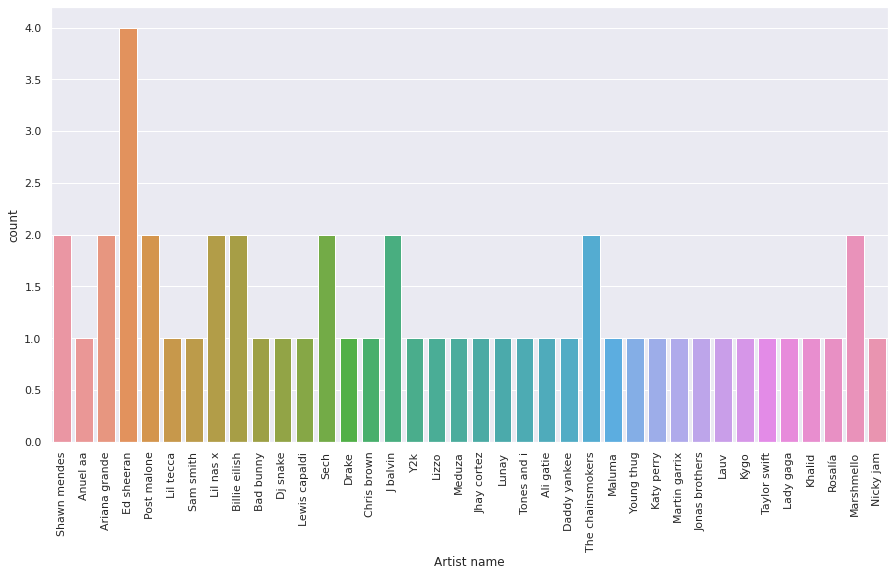

In [14]:
import seaborn as sns
an = sns.countplot(x="Artist name", data= df)
an.set_xticklabels(an.get_xticklabels(),rotation=90)

sns.set(rc={'figure.figsize':(15,8)})

#### As we can see, Ed Sheeran is the artist with the most songs in the to 50 chart in 2019

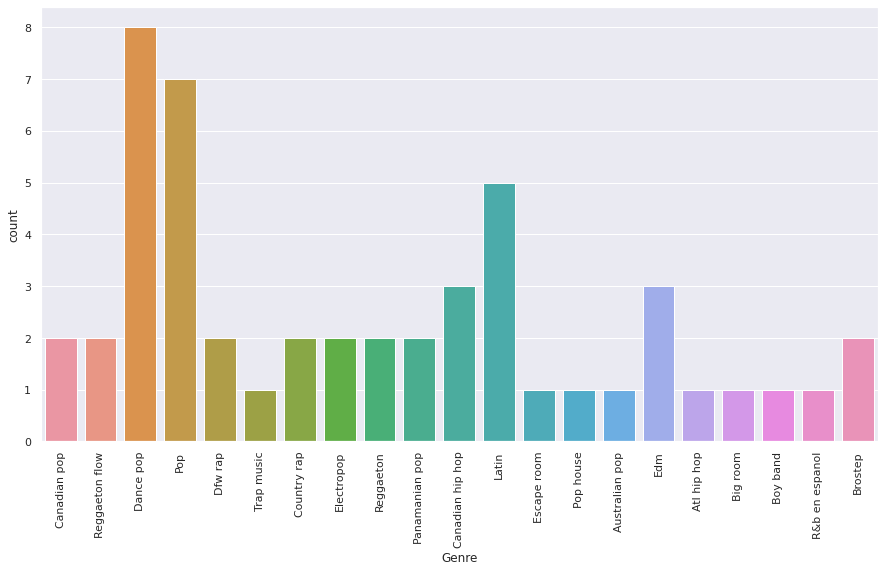

In [7]:
g = sns.countplot(x="Genre", data= df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

sns.set(rc={'figure.figsize':(15,8)})

#### The 3 genres more listened to where Dance pop, Pop and Latin

## Now, I will start to relate variables in order to find patterns

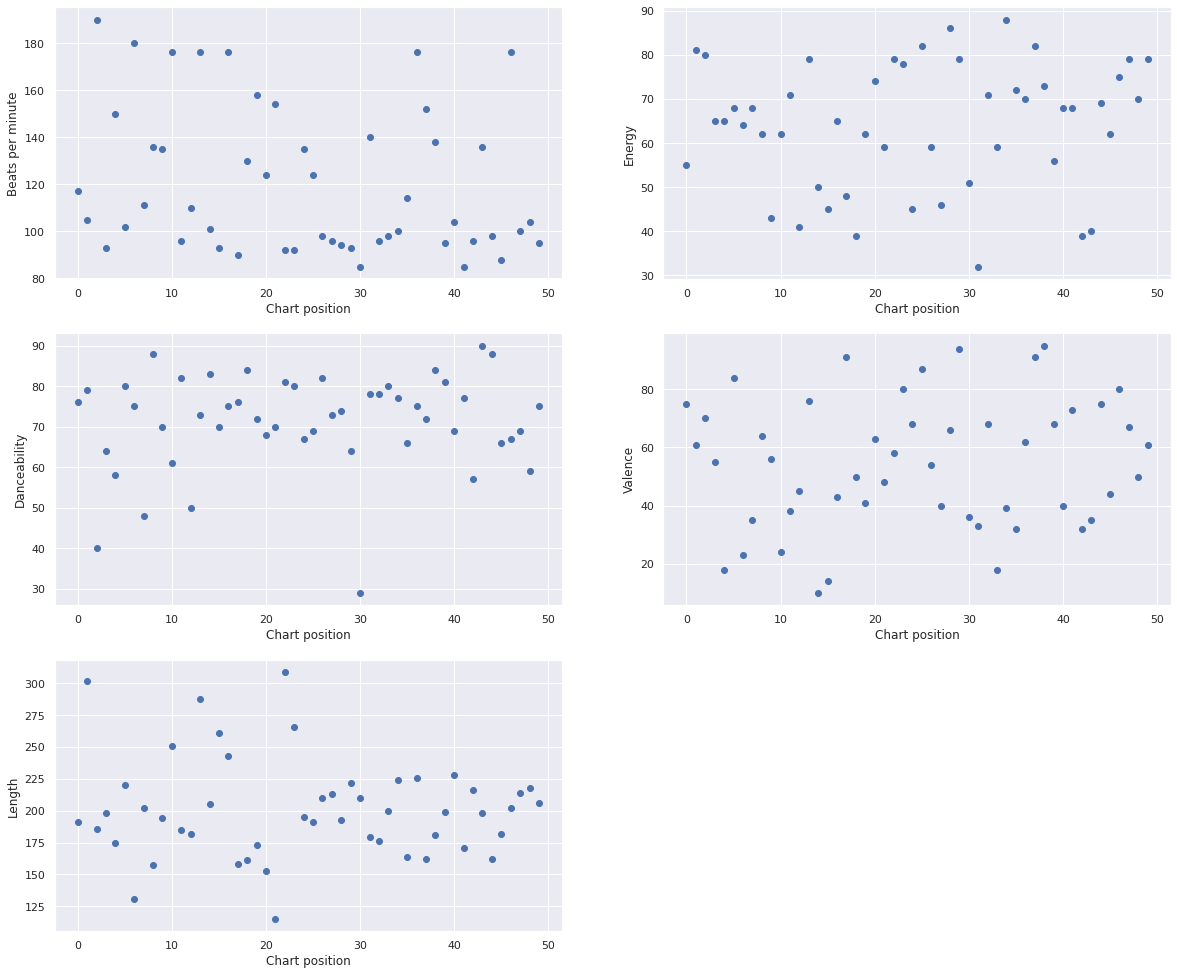

In [13]:
qualities = ['Beats per minute','Energy','Danceability','Valence','Length']

plt.figure(figsize=(20,17))
for v in range(len(qualities)):
    plt.subplot(len(qualities)//2+1,len(qualities)//2, v+1)
    plt.ylabel(qualities[v])
    plt.xlabel("Chart position")
    plt.scatter( df.index, df[qualities[v]] )
plt.show()

#### From this quick analysis we can extract the following conclusions; 
####    -  most of the songs have a low value for beats per minute
####    -  most of the songs have a high value for danceability
####    -  most of the songs in the chart have an average length
####    -  there is no clear conclusion about the relation between energy-chart position and valence-chart position

## Top genres of most listened to artist into detail

In [9]:
df[df["Artist name"]=="Ed sheeran"]["Genre"].value_counts()

Pop    4
Name: Genre, dtype: int64

#### There is no sense in representing these values because its always the same genre

## I would like to study the relation between each artists followers in spotify and their position on the chart

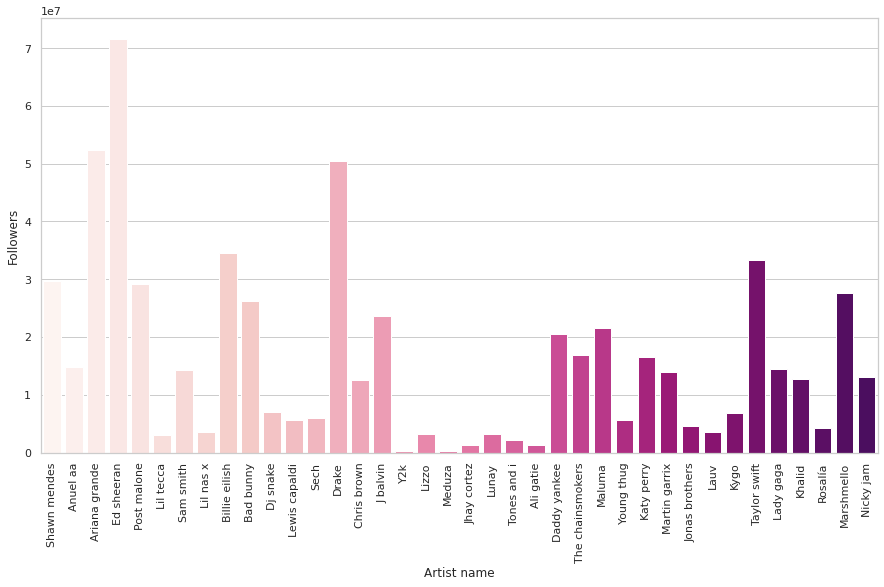

In [18]:
sns.set_theme(style="whitegrid")

f= sns.barplot(x="Artist name", y="Followers", palette = 'RdPu', data=df)
f.set_xticklabels(f.get_xticklabels(),rotation=90)

sns.set(rc={'figure.figsize':(15,8)})

#### Here we can corroborate how Ed Sheeran not only has the most songs in the chart but also the most followers